## Tarea clasificador iris con naive bayes

JHON JAIRO CASTILLO CIFUENTES 

2167742
___________________________________________________________________________

**Clasificador basado en naive bayes**

Los modelos de Naive Bayes son una clase especial de algoritmos de clasificación de Aprendizaje Automatico, o Machine Learning que se basan en una técnica de clasificación estadística llamada “teorema de Bayes”.

Estos modelos son llamados algoritmos “Naive”, o “Inocentes” en español. En ellos se asume que las variables predictoras son independientes entre sí. En otras palabras, que la presencia de una cierta característica en un conjunto de datos no está en absoluto relacionada con la presencia de cualquier otra característica [1].

El clasificador Naive Bayes asume que el efecto de una característica particular en una clase es independiente de otras características. Por ejemplo, un solicitante de préstamo es deseable o no dependiendo de sus ingresos, historial de préstamos y transacciones anteriores, edad y ubicación. Incluso si estas características son interdependientes, estas características se consideran de forma independiente. Esta suposición simplifica la computación, y por eso se considera ingenua. Esta suposición se denomina independencia condicional de clase [2].

La formula del teorema de Bayes es la siguiente:

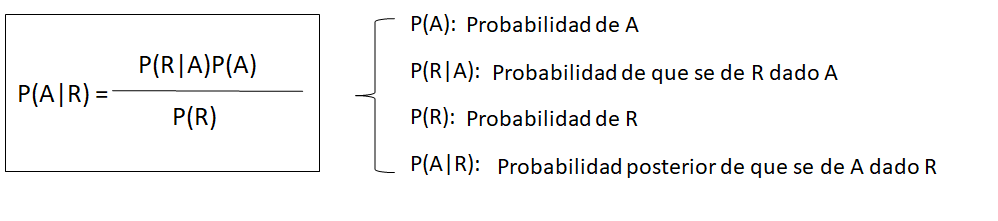

En caso de que se tenga una sola característica, el clasificador Naive Bayes calcula la probabilidad de un evento en los siguientes pasos:

Paso 1: calcular la probabilidad previa para las etiquetas de clase dadas.

Paso 2: determinar la probabilidad de probabilidad con cada atributo para cada clase.

Paso 3: poner estos valores en el teorema de Bayes y calcular la probabilidad posterior.

Paso 4: ver qué clase tiene una probabilidad más alta, dado que la variable de entrada pertenece a la clase de probabilidad más alta.[2]



___________________________________________________________________________

**VENTAJAS Y DESVENTAJAS**

*VENTAJAS*

* Un manera fácil y rápida de predecir clases, para problemas de clasificación binarios y multiclase.

* En los casos en que sea apropiada una presunción de independencia, el algoritmo se comporta mejor que otros modelos de clasificación, incluso con menos datos de entrenamiento.
* El desacoplamiento de las distribuciones de características condicionales de clase significan que cada distribución puede ser estimada independientemente como si tuviera una sola dimensión. Esto ayuda con problemas derivados de la dimensionalidad y mejora el rendimiento.



*DESVENTAJAS*

* Aunque son unos clasificadores bastante buenos, los algoritmos Naive Bayes son conocidos por ser pobres estimadores. Por ello, no se deben tomar muy en serio las probabilidades que se obtienen.

* La presunción de independencia Naive muy probablemente no reflejará cómo son los datos en el mundo real.
* Cuando el conjunto de datos de prueba tiene una característica que no ha sido observada en el conjunto de entrenamiento, el modelo le asignará una probabilidad de cero y será inútil realizar predicciones. Uno de los principales métodos para evitar esto, es la técnica de suavizado, siendo la estimación de Laplace una de las más populares.

___________________________________________________________________________

A continuacion se presenta su implementacion con sklearn para clasificar el dataset de flores iris

Para ello el primer paso consiste en llamar las librerias necesarias para el funcionamiento del algoritmo

In [ ]:
 from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

##Importacion y lectura del dataset## 

Para esta clasificacion se usara el dataset iris el cual clasifica 3 tipos de flores de esta especie a partir de 4 variables como lo son el ancho y el largo del sepalo en cm, asi como el ancho y el largo de los petalos, donde a partir de las diferentes caracteristicas se pueden tener tres especies de flores (Iris-setosa, Iris-versicolor e Iris-verginica)

Esto hace que sea un dataset de 149 filas y 5 columnas

In [ ]:

import pandas as pd
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None,sep=',')
iris.columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
iris


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


A continuacion verificamos que no hallan datos vacios en el dataset

In [ ]:
iris.info()
total = iris.isnull().sum().sort_values(ascending=False)
percent_1 = iris.isnull().sum()/iris.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(iris.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,Total,%
Species,0,0.0
PetalWidthCm,0,0.0
PetalLengthCm,0,0.0
SepalWidthCm,0,0.0
SepalLengthCm,0,0.0


Se realizan un par de graficos para ver el comportamiento de los datos para cada especie de flor y ver si hay algun tipo de agrupacion

A continuacion se realiza el grafico de largo vs ancho del sepalo

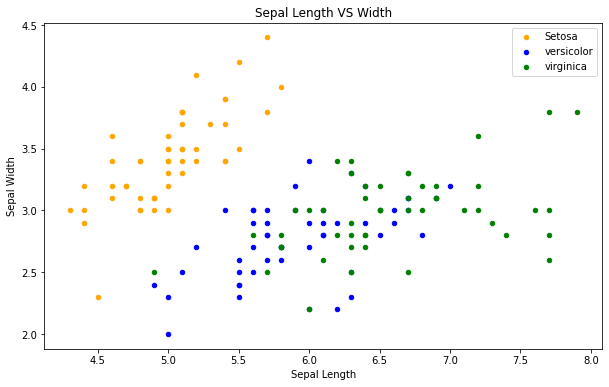

In [ ]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

largo vs ancho del sepalo

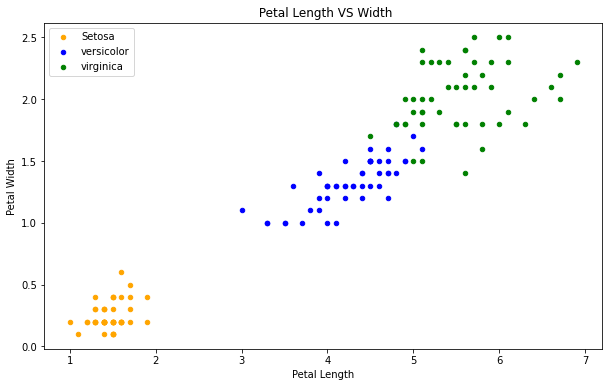

In [ ]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

Como podemos apreciar en los graficos anteriores vemos que es mas facil agrupar las especies en funcion a las medidas de los petalos ya que los sepalos tienen varios datos mezclados entre si.

Con el fin de ver la relacion global entre todos los datos se realiza un mapa de calor en el cual observemos que variables tienen mas correlacion en las entradas.

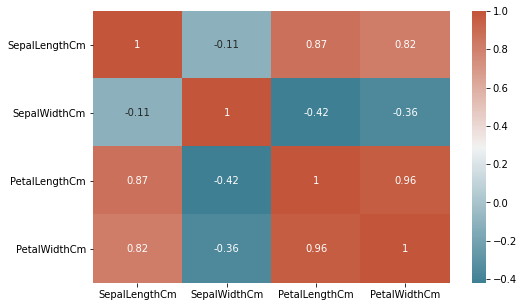

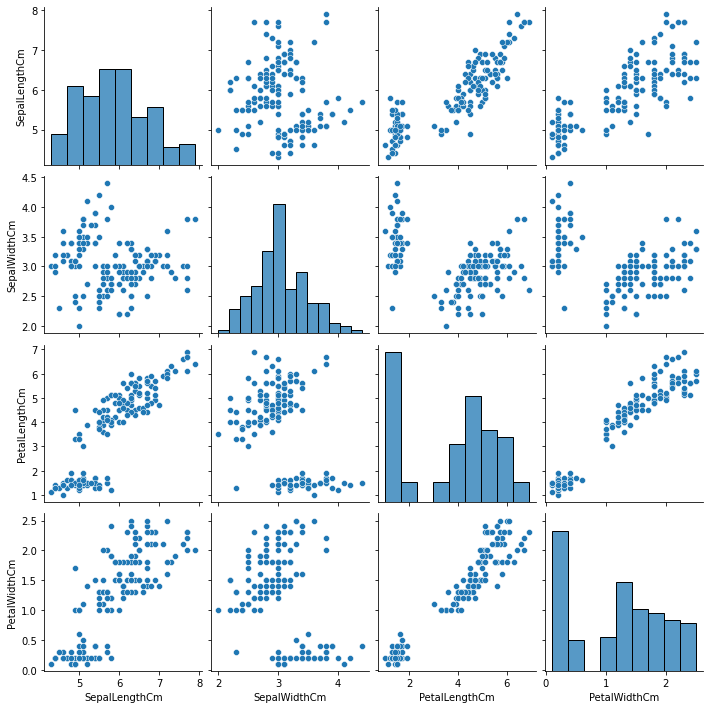

In [ ]:
corr = iris.corr()
plt.subplots(figsize=(8,5))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.pairplot(iris)
plt.show()

Una vez realizada la correlacion podemos observar que cada entrada se relacion con alguna de las otras tres en gran medida.


___________________________________________________________________________

**Normalizacion**

Ahora para optimizar la clasificacion se debe normalizar los datos de entrada

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = iris.iloc[:,0:4]
Y = iris.iloc[:,4]
scaler1 = MinMaxScaler(feature_range=(-1, 1))
scaler1.fit(X)
X_n=scaler1.transform(X)
X_n = np.array(X_n)

**Division del dataset**

Ahora dividimos el dataset con 30% de datos de validacion y el resto para entrenamiento


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_n, Y, test_size=0.3)

**Metodo de naive bayes gausiano**

Para este metodo se usa la libreria sklearn e importamos GaussianNB la cual trae un modelo basado en el metodo estadistico del teorema de bayes, es un modelo que al igual que perceptron o regresion logistica se lleva a cabo haciendo un .fit dandole los datos de entrenamiento.

In [ ]:
from sklearn.naive_bayes import GaussianNB
modeloClasificador = GaussianNB()
modeloClasificador.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Una vez realizado el entrenamiento queda comprobar la clasificacion 

**datos de entrenamiento**

A continuacion se prueba el modelo con los datos de entrenamiento y asi observar que tan eficaz es el metodo

Accuracy: 0.96
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        32
Iris-versicolor       0.95      0.95      0.95        37
 Iris-virginica       0.94      0.94      0.94        36

       accuracy                           0.96       105
      macro avg       0.96      0.96      0.96       105
   weighted avg       0.96      0.96      0.96       105



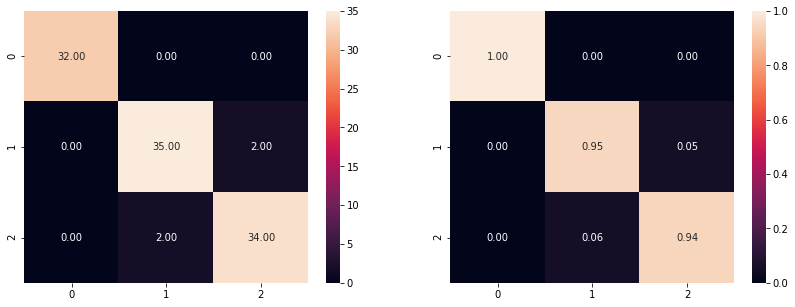

In [ ]:
from sklearn.metrics import classification_report
fig, ax = plt.subplots(figsize=(14,5),ncols=2,nrows=1)
y_predT = modeloClasificador.predict(X_train)
print('Accuracy: %.2f' % accuracy_score(y_train, y_predT))
sns.heatmap(confusion_matrix(y_train, y_predT), fmt=".2f", annot=True, ax=ax[0]);
sns.heatmap(confusion_matrix(y_train, y_predT, normalize='true'), fmt=".2f", annot=True, ax=ax[1]);
print(classification_report(y_train, y_predT))

Como se puede observar el metodo clasifico bien los tres tipos de flores con dos datos erroneos, de igual manera se obtuvo un accuracy de 96% lo que indica un alto grado de clasificacion

**datos de validacion**

Se realiza el mismo procedimiento para los datos de validacion

Accuracy: 0.96
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.86      0.92        14

       accuracy                           0.96        45
      macro avg       0.96      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



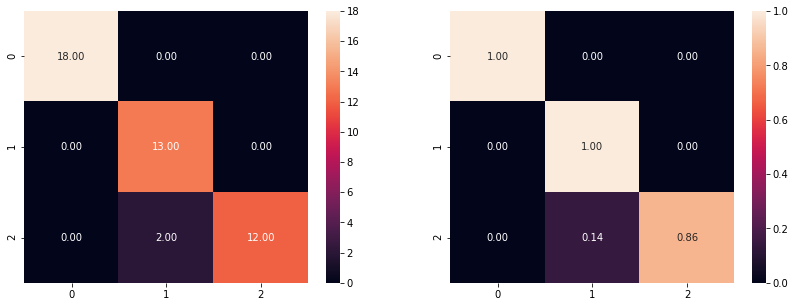

In [ ]:




fig, ax = plt.subplots(figsize=(14,5),ncols=2,nrows=1)
y_predV = modeloClasificador.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_predV))
sns.heatmap(confusion_matrix(y_test, y_predV), fmt=".2f", annot=True, ax=ax[0]);
sns.heatmap(confusion_matrix(y_test, y_predV, normalize='true'), fmt=".2f", annot=True, ax=ax[1]);
print(classification_report(y_test, y_predV))






Para los datos de validacion se puede observar que clasifico bien los datos de las especies Iris setosa e Iris verginica y erró en 2 datos de la especie iris- versicolor, al igual que los datos de entrenamiento se obtuvo un accuracy de 96%

En conclusion de puede afirmar que el metodo de naives bayes es un metodo funcional y que puede arrojar buenos resultados basado en probabilidades y que es capaz de hacer una buena clasificacion en este dataset

**REFERENCIAS**

[1]Roman. V. "Algoritmos naive bayes:Fundamentos e implementacion". 2019, en linea. Disponible en: https://medium.com/datos-y-ciencia/algoritmos-naive-bayes-fudamentos-e-implementaci%C3%B3n-4bcb24b307f

[2]Sin nombre. "naive bayes teoria". en linea. Disponible en: https://aprendeia.com/naive-bayes-teoria-machine-learning/

[3]Sin nombre. "IRIS data: Naive Bayes (Spanish language)". 2019, en linea. Disponible en:https://www.kaggle.com/carloskl12/iris-data-naive-bayes-spanish-language

[4]sin nombre. "naive bayes". en linea. disponible en: https://scikit-learn.org/stable/modules/naive_bayes.html
